# Data Analytics

## Analytics Approaches

Analyzing the built-in `mpg` dataset of Seaborn, here are some good approaches or steps to analyze the dataset.

### Step 1: Understand the Data Structure

First, we need to understand the structure of the dataset, including the data types, missing values, duplicated values.

This step helps identify potential data quality issues and provides a sense of how the data is distributed.

Code to check Data Structure:

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

mpg_df = sns.load_dataset('mpg')

# check the data types and missing values
print(mpg_df.info())

# display summary statistics for numeric columns
print(mpg_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

### Step 2: Exploratory Data Analysis (EDA)

EDA is a crucial part of the data analysis process. It involves visualizing and summarizing the main characteristics of the dataset, often with visual methods. Here is what we should look for:

1. <span style="color:orange;">Distribution of Numeric Variables</span>: Understand how the variables like `mpg` (miles per gallon), `horsepower`, etc., are distributed.

2. <span style="color:orange;">Relationships Between Variables</span>: Check for correlations and relationships between different variables (e.g., `mpg` vs `horsepower`).

Here are some codes for EDA:

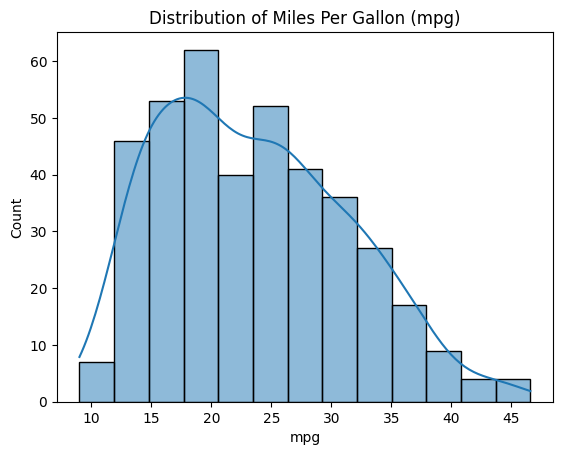

In [4]:
# Histogram for distribution of 'mpg'
sns.histplot(
    data=mpg_df,
    x='mpg',
    kde=True
)
plt.title('Distribution of Miles Per Gallon (mpg)')
plt.show()

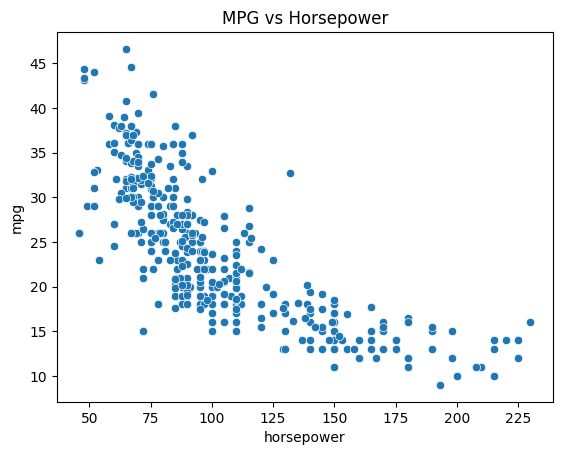

In [5]:
# Scatter plot for 'mpg' vs 'horsepower'

sns.scatterplot(
    data=mpg_df,
    x='horsepower', y='mpg',
)
plt.title('MPG vs Horsepower')
plt.show()

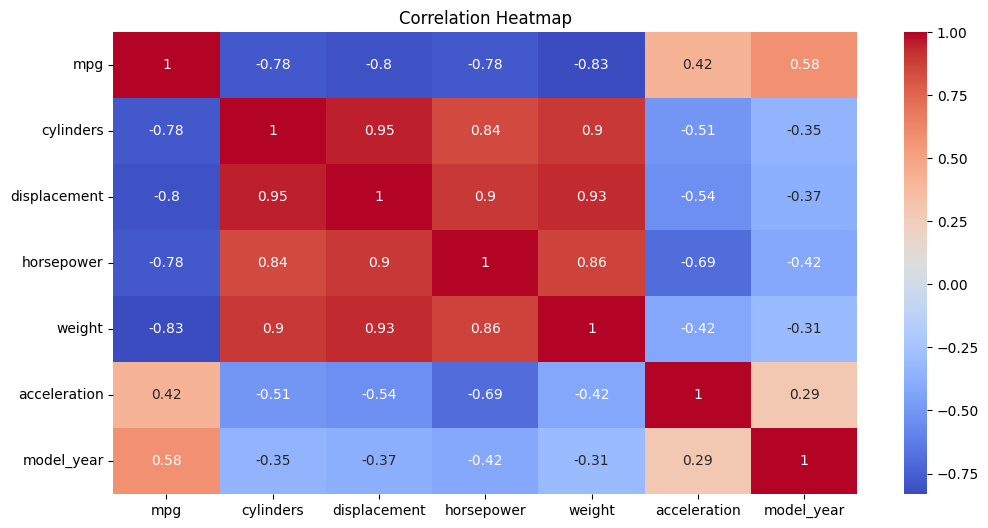

In [8]:
# Heatmap for correlation between numeric features

# First select only numeric columns for correlation, or we will get ValueError
numeric_df = mpg_df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    data=numeric_df.corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()

### Step 3: Investigate Specific Questions or Hypotheses

Based on the EDA, we can ask specific questions. For example, are cars from a certain origin (like 'usa') generally less fuel-efficient? We can investigate this by grouping data by origin and summarizing the mpg.

Here is the code to investigate specific questions:

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64


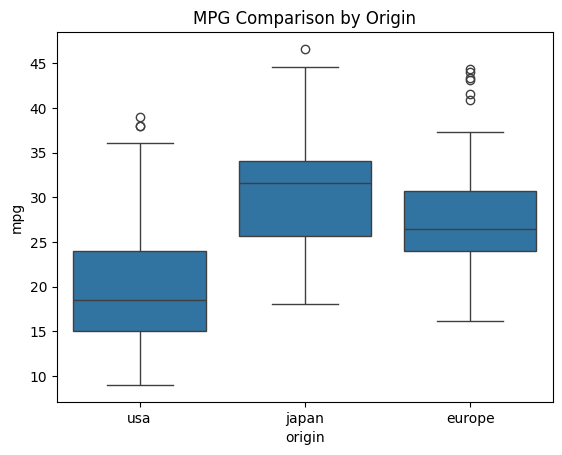

In [10]:
# Group by 'origin' and calculate the mean 'mpg'
origin_mpg = mpg_df.groupby('origin')['mpg'].mean()
print(origin_mpg)


# Box plot to compare 'mpg' across different 'origin'
sns.boxplot(
    data=mpg_df,
    x='origin', y='mpg'
)
plt.title('MPG Comparison by Origin')
plt.show()


### Step 4: Derive Insights and Conclusions

Based on the analysis, we draw insights and form conclusions. For example, if we find that cars from 'usa' have significantly lower mpg than those from 'japan' or 'europe', we might conclude that American cars in this dataset are generally less fuel-efficient.

By following these steps and using the provided code, we will approach the dataset methodically, like a seasoned data analyst. 

## Case Study: Python Seaborn Visualization for Numeric Variables | Histogram, KDE (Kernel Density Estimate) Plot

source: https://www.youtube.com/watch?v=5VD4V3uIkJc 

Variables in a dataset are divided into:
- Categorical Variables
- Numeric Variables

Let's start with a real-world task

**Background:**

East High has a strong focus on ensuring academic success for each student. Recently, the dean wants to improve student performance, primarily on Mathematics and Reading, so that the school can obtain more sponsorships and resources.

**Task:**

As a data scientist, how can you use data-driven approaches to analyze student performance and provide insights for this education organization?



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
student_df = pd.read_csv('student.csv')
print(student_df.head())
print(student_df.info())
print(student_df.describe())

   gender ethnicity  parental_education         lunch test_preparation_course  \
0  female   group B   bachelor's degree      standard                    none   
1  female   group C        some college      standard               completed   
2  female   group B     master's degree      standard                    none   
3    male   group A  associate's degree  free/reduced                    none   
4    male   group C        some college      standard                    none   

   math_score  reading_score  writing_score  
0          72             72             74  
1          69             90             88  
2          90             95             93  
3          47             57             44  
4          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender               

In [17]:
# check for duplicates
student_df.duplicated().values.any()

np.False_

### **Understanding the dataset:**

The dataset consists of 8 columns. The first five, namely `gender`, `ethnicity`, `parental_education`, `lunch`, `test_preparation_course`, are categorical variables. The remaining three, namely `math_score`, `reading_score`, `writing_score` are numeric variables.

### **Consider what insights to draw from the dataset**

We will answer the following questions:
- What is the distribution of math_score?
- What is the distribution of math_score across gender?
- across ethnicity?
- What is the relationship between math_score and reading_score?

#### What is the distribution of math_score?

<span style="color:orange;">Distribution</span> can be visualized using a <span style="color:orange;">histogram</span>.

<span style="color:orange;">Distribution of numeric variables across a categorical variable</span> can also be visualized using a <span style="color:orange;">histogram</span> if there are only few categories. For a lot of categories, a <span style="color:orange;">box chart</span> will be more appropriate.

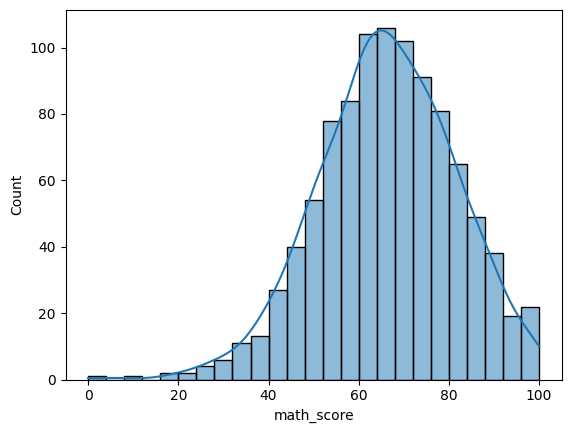

In [18]:
# create a histogram to visualize the distribution of math_score
sns.histplot(
    data=student_df,
    x='math_score',
    kde=True
)
plt.show()

According to the histogram, we can see that most students score from 60 to 80 in maths.

NOTE:

`kde` stands for Kernel Density Estimate. It is used to estimate the probability density function of a continuous random variable. In simpler term, it shows where the data points are most concentrated and helps you see the overall shape of the data distribution (whether it's skewed, has multiple peaks, etc.) more clearly.

Why do we use `kde`?\
While a histogram shows the frequency of data points in specific bins, it can sometimes be a bit `blocky` or `jagged` due to the bin sizes and counts. The KDE smooths out these blocks to show a more continuous distribution, making it easier to see patterns in the data. Think of the `kde` line as a "softened" version of the histogram that helps highlight the underlying trend of your data without the choppiness of individual bars.

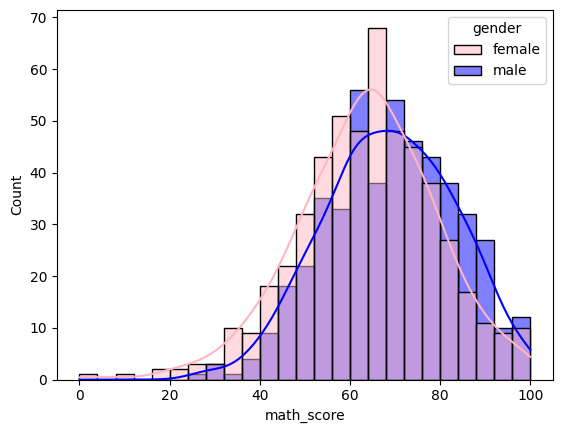

In [22]:
# create a histogram to visualize the distribution of math_score across gender
sns.histplot(
    data=student_df,
    x='math_score',
    hue='gender',
    palette=['lightpink', 'blue'],
    kde=True
)
plt.show()

We see that male students score higher than female students in maths, mostly concentrated between the scores of 60 and 80.

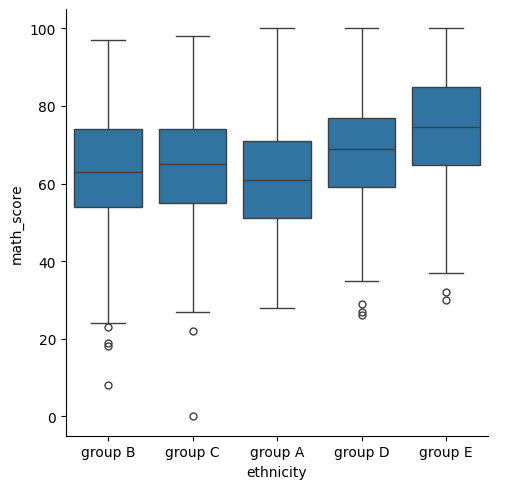

In [20]:
# create a histogram to visualize the distribution of math_score across ethnicity. Since ethnicity has many categories, it would be clearer to visualize as a boxplot or a kde plot

# create a boxplot
sns.catplot(
    data=student_df,
    x='ethnicity',
    y='math_score',
    kind='box'
)
plt.show()

We see that `group A` has the lowest median in maths, while `group E` has the highest.

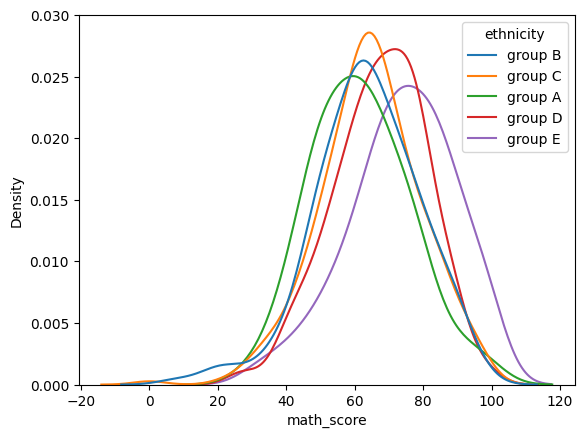

In [29]:
# create a kde plot
sns.kdeplot(
    data=student_df,
    x='math_score',
    hue='ethnicity',
    common_norm=False
)
plt.show()

Likewise, the kdeplot also shows that `group A` has the lowest distribution in maths compared to all other groups, while `group E` has the highest.

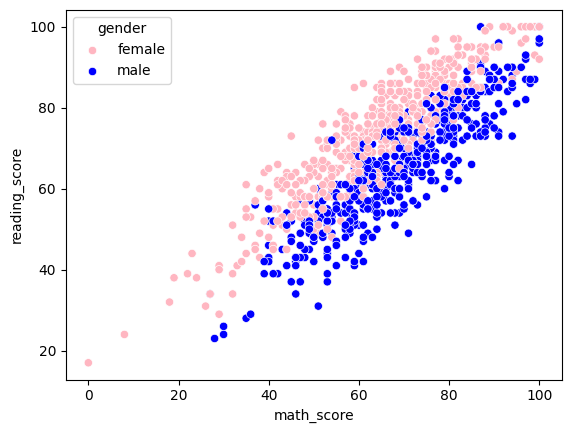

In [34]:
# create a scatter plot to show the relationship between math_score and reading_score
sns.scatterplot(
    data=student_df,
    x='math_score',
    y='reading_score',
    hue='gender',
    palette=['lightpink', 'blue']
)
plt.show()

Interestingly, this plot shows that the higher the math_score, the higher the reading_score. Female students tend to score higher than male students in reading while lower than them in maths.

## Statistics

### Standard Deviation

The standard deviation is a measure of the amount of variation or dispersion in a set of values. There are two main formulas for standard deviation, depending on whether you are working with a `sample` (a subset of the dataset) or an entire `population` (the entire dataset).

1. Population Standard Deviation:

If you have data for every member of a population, the standard deviation (denoted as  \sigma ) is calculated using:

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

where:
- $N$ is the number of `data points` (a.k.a `observations`, which simply means the number of rows) in the `population` (the entire dataset)
- $x_i$ represents each individual data point
- $\mu$ is the population mean

2. **Sample Standard Deviation:**

If you are working with a sample from a larger population, the standard deviation (denoted as $s$) is calculated using:

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

where:
- $n$ is the number of `data points` in the `sample`
- $x_i$ represents each individual data point in the sample
- $\bar{x}$ is the sample mean

The key difference between the two formulas is the denominator:  $N$  for the population and  $n - 1$  for the sample. The  $n - 1$  in the sample formula is known as `Bessel’s correction`, and it corrects the bias in the estimation of the population `variance` and `standard deviation`.

### Variance

**Variance** is a statistical measure that represents the degree of spread or dispersion in a set of data points. It quantifies how much the values in a dataset differ from the mean (average) of the dataset.

#### Mathematical Definition

The variance measures the average squared deviation of each data point from the mean. It gives a sense of how spread out the data points are around the mean. A higher variance indicates that the data points are more spread out, while a lower variance suggests they are closer to the mean.

#### Formulas for Variance

There are two formulas for calculating variance, depending on whether you are dealing with a population or a sample:

1. Population Variance ($\sigma^2$):

If you have data for the entire population, the population variance is calculated as:

$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$

where:
- $N$ is the total number of data points in the population
- $x_i$ is each individual data point
- $\mu$ is the population mean

2. **Sample Variance ($s^2$):**

If you are working with a sample from a larger population, the sample variance is calculated as:

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

where:
- $n$ is the number of data points in the sample
- $x_i$ is each individual data point in the sample
- $\bar{x}$ is the sample mean

#### Relationship between Variance and Standard Deviation

Variance and Standard Deviation are closely related:

- Standard Deviation is the square root of the Variance. It is expressed in the same units as the data, making it more interpretable in practical terms.

$$
\sigma = \sqrt{\sigma^2} \quad \text{and} \quad s = \sqrt{s^2}
$$

- Variance is useful when you want to understand the spread in a more mathematical sense, but because it is in squared units, it is less intuitive. Standard deviation is often preferred in descriptive statistics because it provides a measure of spread in the same units s the data.

##### Example of how Variance differs from Standard Deviation

Definitions in a more simple term:

- Variance is like finding the average of how far each number in a group is from the average of that group.
- Standard deviation is also like finding the average of how far each number in a group is from the average of that group, but in a smaller scale (square root). In other words, it tells us, on average, how far away the numbers in a group are from the average.

Imagine you have three friends, and you ask them how many books they read last month:
- Friend A: 2 books
- Friend B: 4 books
- Friend C: 6 books

**Variance**
1. Find the Mean (Average):
- The mean number of book is $\frac{2+4+6}{3} = 4$

2. Calculate each Difference from the Mean:
- Friend A: $2-4 = -2$
- Friend B: $4-4 = 0$
- Friend C: $6-4 = 2$

3. Square each difference:
Squaring makes all differences positive:
- Friend A: $(-2)^2 = 4$
- Friend B: $0^2 = 0$
- Friend C: $2^2 = 4$

4. Calculate the Variance:
The Variance is the average of these squared differences:
$$
\text{Variance} = \frac{4 + 0 + 4}{3} = \frac{8}{3} \approx 2.67
$$

This result tells us that numbers are somewhat spread out around the mean. The larger the variance, the more spread out the numbers are.

**Standard Deviation**
1. Use the Variance:
from the above calculation, the variance is $2.67$.

2. Calculate the Standard Deviation:
The Standard Deviation is the square root of the Variance:
$$
\text{Standard Deviation} = \sqrt{2.67} = 1.63
$$

This tells us that, on average, the number of books each friend read is about 1.63 books away from the mean of 4 books.


**Still blurry to understand the difference?**

Imagine you’re looking at a group of people standing on a line at different distances from a point (the mean):

- Variance: Think of it as looking at the squares of those distances. It gives you an idea of spread, but in a way that’s harder to visualize.
- Standard Deviation: Think of it as looking at the actual distances. It’s more straightforward to understand and visualize.

In summary, variance tells you about the spread but in a more abstract way (squared units), while standard deviation tells you about the spread in a more intuitive and direct way (same units as the data).

### `common_norm` parameter in `kdeplot()`

**common_norm=True:**

- All KDE curves combined have an area of 1.
- Wider curve: Indicates that data points are more spread out (more variability).
- Narrower curve: Indicates that data points are less spread out (less variability).
- Higher curve: Indicates a higher density or concentration of data points in that range relative to the total.
- Lower curve: Indicates a lower density or concentration of data points in that range relative to the total.

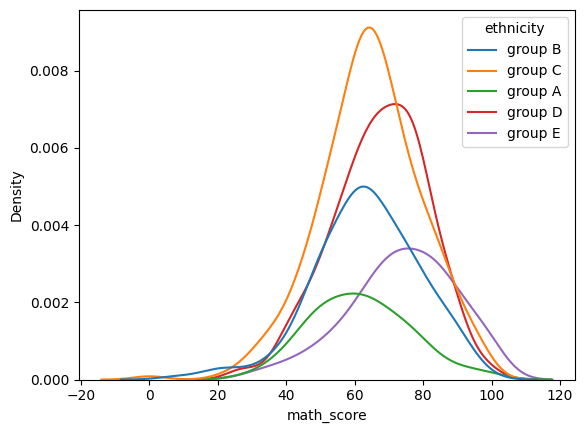

In [30]:
sns.kdeplot(
    data=student_df,
    x='math_score',
    hue='ethnicity',
    common_norm=True
)
plt.show()

**common_norm=False:**

- Each KDE curve is normalized separately. The area under each curve is 1 independently.
- Wider curve: Indicates that data points are more spread out (more variability).
- Narrower curve: Indicates that data points are less spread out (less variability).
- Higher curve: Indicates a high density or concentration of data points in that range in that category.
- Lower curve: Indicates a lower density or concentration of data points in that range in that category.

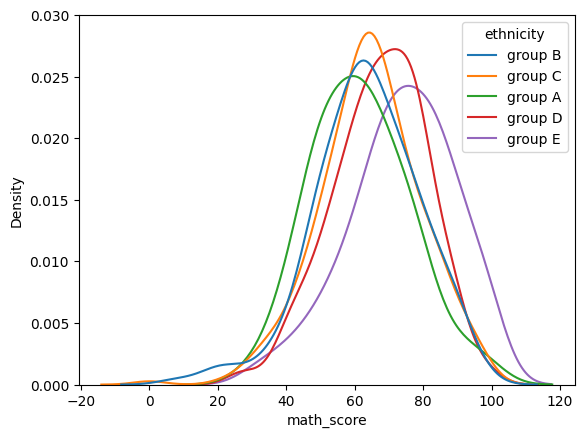

In [31]:
sns.kdeplot(
    data=student_df,
    x='math_score',
    hue='ethnicity',
    common_norm=False
)
plt.show()